<a href="https://colab.research.google.com/github/clemcoste/DSTI_ML_with_Python_Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

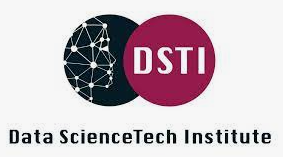

# Project Summary

Nowadays with so many books available, it can be hard to select the best ones to read. The dataset provided is a curation of Goodreads books based on real user information. It can be used for many tasks like predicting a book’s rating or recommending new books.



# Project Objectives

Using the provided dataset, you are asked to train a model that predicts a book’s rating. The project can be submitted as a Jupyter Notebook and should include exploratory analysis of the data, feature engineering and selection, model training and evaluation.

# Project Code



## Add libraries

In [1]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify

## Data Preparation

### Import dataset

Note : Firstly, we opened the csv file and we observed the following shape with delimiter = ',' : (11128 * 12)

In [3]:
url = 'https://raw.githubusercontent.com/clemcoste/DSTI_ML_with_Python_Project/main/books.csv'

# Check if the dataset is consistent before dataframe creation
#df = pd.read_csv(url, sep=',', index_col="bookID")

There is at least one row (3350) which as more than 12 columns after parsing the dataset with the comma delimiter. After observation, it is related to the fact that there is a comma in the "authors" field, which results in a 13 columns shape. So it means we have to import the dataset, check how many errors of this type are present and then conclude.

In [4]:
# Store the dataset in a Pandas Dataframe and filter bad lines
#df = pd.read_csv(url, sep=",", index_col="bookID", on_bad_lines='skip')

# Local file (offline mode)
#df = pd.read_csv("books.csv", sep=",", index_col="bookID", on_bad_lines='skip')
df = pd.read_csv("books.csv", sep=",", on_bad_lines='skip')

df.shape

(11123, 12)

We observe that there are 5 rows where dropped in total (0,04% of the dataset).
It is acceptable to continue with this filtered dataset.
Let's now check that there is no NaN values in the dataset :

In [5]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

## Data understanding & exploration

Let's display the info of the dataframe in order to have mainly the different datatypes here:


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Let's display the head and observe the different fields.

In [7]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [8]:
df.tail(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11122,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


Below is the information you have regarding the dataset attributes:
1.   bookID: A unique identification number for each book.
2.   title: The name under which the book was published.
3.   authors: The names of the authors of the book. Multiple authors are delimited by
“/”.
4.   average_rating: The average rating of the book received in total.
5.   isbn: Another unique number to identify the book, known as the International
Standard Book Number.
6.   isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
7.   language_code: Indicates the primary language of the book. For instance, “eng” is standard for English.
8.   num_pages: The number of pages the book contains.
9.   ratings_count: The total number of ratings the book received.
10.   text_reviews_count: The total number of written text reviews the book received.
11.   publication_date: The date the book was published.
12.   publisher: The name of the book publisher.

We can have a view with the describe function in order to have an idea of the mean, count, min or max values for example, concerning the numeric values of the dataset.

Here for example with the describe method, all the variables are relevant except for the ISBN code which is an ID.

In [9]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Something that can be interesting is to plot the different ratings in order to have an overview.

<AxesSubplot:>

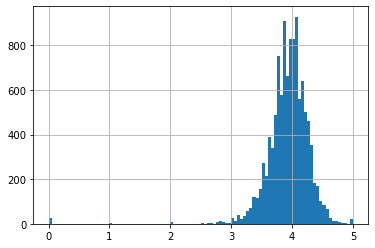

In [10]:
df['average_rating'].hist(bins=100)

In [11]:
# We can display top10 books based on ratings:
df[["title","average_rating","ratings_count"]].sort_values(by=['ratings_count', 'average_rating'], ascending=[False, False]).head(10)

,title,average_rating,ratings_count
10336,Twilight (Twilight #1),3.59,4597666
1697,The Hobbit or There and Back Again,4.27,2530894
1462,The Catcher in the Rye,3.80,2457092
307,Angels & Demons (Robert Langdon #1),3.89,2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585
4415,Harry Potter and the Chamber of Secrets (Harry...,4.42,2293963
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167
23,The Fellowship of the Ring (The Lord of the Ri...,4.36,2128944
2114,Animal Farm,3.93,2111750
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690


We could analyze if the biggest books are impacted on the rattings, compared to lighter books.

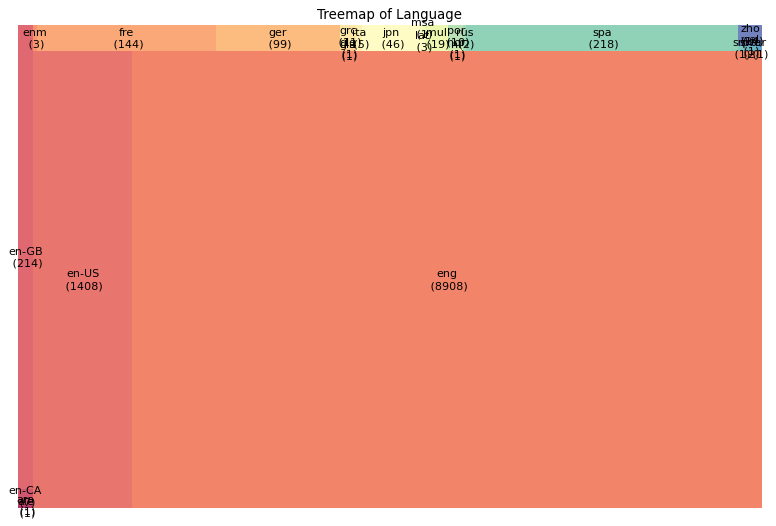

In [12]:
# Prepare Data
df_sq = df.groupby('language_code').size().reset_index(name='counts')
labels = df_sq.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_sq['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Language')
plt.axis('off')
plt.show()

Be inspired by : [different plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#15.-Ordered-Bar-Chart)

Here we can also check :
- average ratings depending on the book size
- average ratings depending of the review count

## Data cleaning

#### Clean column names

In [103]:
df.rename(columns={'  num_pages': 'num_pages'}, inplace=True)
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


#### Aggregate languages

In [104]:
# We can list all the different languages available
lang_list = list(df['language_code'])
lang_list = set(lang_list)
lang_list

{'ale',
 'ara',
 'en-CA',
 'en-GB',
 'en-US',
 'eng',
 'enm',
 'fre',
 'ger',
 'gla',
 'glg',
 'grc',
 'ita',
 'jpn',
 'lat',
 'msa',
 'mul',
 'nl',
 'nor',
 'por',
 'rus',
 'spa',
 'srp',
 'swe',
 'tur',
 'wel',
 'zho'}

In [105]:
# We observe 5 types of english : 'en-CA','en-GB','en-US','eng', 'enm'
# We can try to check the number of occurrences
print('Nb of books with language = eng => ',len(df.query("language_code == 'eng'")))
print('Nb of books with language = en-CA => ',len(df.query("language_code == 'en-CA'")))
print('Nb of books with language = en-GB => ',len(df.query("language_code == 'en-GB'")))
print('Nb of books with language = en-US => ',len(df.query("language_code == 'en-US'")))
print('Nb of books with language = enm => ',len(df.query("language_code == 'enm'")))

Nb of books with language = eng =>  8908
Nb of books with language = en-CA =>  7
Nb of books with language = en-GB =>  214
Nb of books with language = en-US =>  1408
Nb of books with language = enm =>  3


In [106]:
# We can aggregate all english languages to simplify the dataset
df_filtered = df.replace(to_replace =["en-CA", "en-GB", "en-US", "enm"], value ="eng")
print('Nb of books with language = eng => ',len(df_filtered.query("language_code == 'eng'")))
print('Nb of books with language = en-CA => ',len(df_filtered.query("language_code == 'en-CA'")))
print('Nb of books with language = en-GB => ',len(df_filtered.query("language_code == 'en-GB'")))
print('Nb of books with language = en-US => ',len(df_filtered.query("language_code == 'en-US'")))
print('Nb of books with language = enm => ',len(df_filtered.query("language_code == 'enm'")))

Nb of books with language = eng =>  10540
Nb of books with language = en-CA =>  0
Nb of books with language = en-GB =>  0
Nb of books with language = en-US =>  0
Nb of books with language = enm =>  0


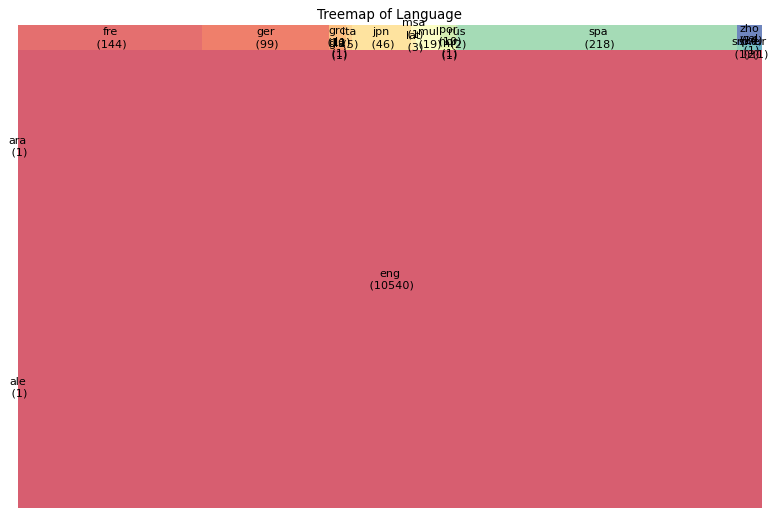

In [107]:
# Prepare Data
df_sq = df_filtered.groupby('language_code').size().reset_index(name='counts')
labels = df_sq.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_sq['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Language')
plt.axis('off')
plt.show()

#### Delete outliers

In [108]:
import seaborn as sns
from scipy import stats

In [112]:
print(df_filtered.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


In [113]:
z=np.abs(stats.zscore(df_filtered['num_pages']))
np.where(z > 3)

(array([    4,     6,    21,    22,    24,   173,   188,   201,   233,
          235,   267,   335,   406,   420,   421,   595,   626,   627,
          648,   667,   669,   702,   713,   715,   722,   724,   811,
          816,  1003,  1005,  1053,  1056,  1102,  1103,  1105,  1148,
         1176,  1370,  1521,  1541,  1571,  1575,  1593,  1625,  1695,
         1766,  1825,  1961,  1981,  1987,  1989,  1990,  2542,  2543,
         2544,  2545,  2559,  2566,  2630,  2650,  2746,  2872,  2962,
         2970,  2972,  3092,  3182,  3244,  3409,  3410,  3478,  3479,
         3483,  3511,  3539,  3657,  3908,  4094,  4160,  4259,  4272,
         4283,  4321,  4322,  4443,  4461,  4676,  4705,  4746,  4832,
         4847,  4867,  5034,  5035,  5037,  5038,  5057,  5279,  5348,
         5361,  5374,  5375,  5377,  5456,  5466,  5484,  5607,  5614,
         5722,  5960,  6257,  6262,  6299,  6303,  6346,  6449,  6451,
         6497,  6587,  6802,  6803,  6812,  6818,  6819,  6822,  6981,
      

In [114]:
df_z = df_filtered[(np.abs(stats.zscore(df_filtered['num_pages'])) < 3)]
df_z

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


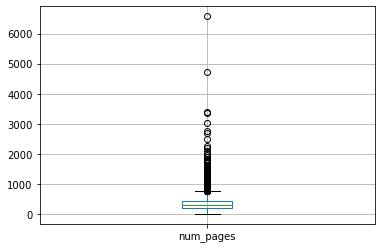

In [115]:
boxplot = df_filtered.boxplot(column=['num_pages'], return_type='axes')

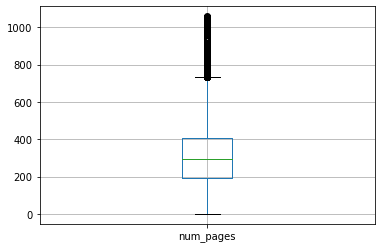

In [116]:
boxplot = df_z.boxplot(column=['num_pages'], return_type='axes')

In [117]:
z_ratingCount=np.abs(stats.zscore(df_filtered['ratings_count']))
np.where(z > 3)

(array([    4,     6,    21,    22,    24,   173,   188,   201,   233,
          235,   267,   335,   406,   420,   421,   595,   626,   627,
          648,   667,   669,   702,   713,   715,   722,   724,   811,
          816,  1003,  1005,  1053,  1056,  1102,  1103,  1105,  1148,
         1176,  1370,  1521,  1541,  1571,  1575,  1593,  1625,  1695,
         1766,  1825,  1961,  1981,  1987,  1989,  1990,  2542,  2543,
         2544,  2545,  2559,  2566,  2630,  2650,  2746,  2872,  2962,
         2970,  2972,  3092,  3182,  3244,  3409,  3410,  3478,  3479,
         3483,  3511,  3539,  3657,  3908,  4094,  4160,  4259,  4272,
         4283,  4321,  4322,  4443,  4461,  4676,  4705,  4746,  4832,
         4847,  4867,  5034,  5035,  5037,  5038,  5057,  5279,  5348,
         5361,  5374,  5375,  5377,  5456,  5466,  5484,  5607,  5614,
         5722,  5960,  6257,  6262,  6299,  6303,  6346,  6449,  6451,
         6497,  6587,  6802,  6803,  6812,  6818,  6819,  6822,  6981,
      

In [118]:
df_z = df_z[(np.abs(stats.zscore(df_filtered['ratings_count'])) < 3)]
df_z

C:\Users\costec\AppData\Local\Temp\ipykernel_19188\3000923002.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = df_z[(np.abs(stats.zscore(df_filtered['ratings_count'])) < 3)]


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


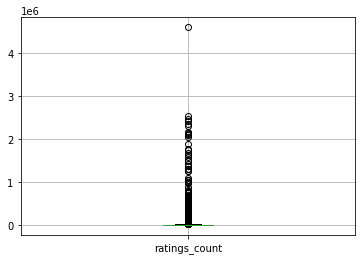

In [119]:
boxplot = df_filtered.boxplot(column=['ratings_count'], return_type='axes')

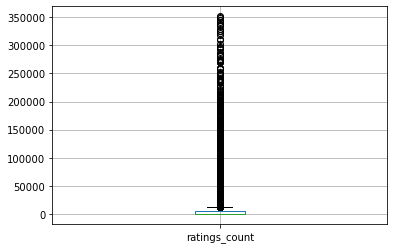

In [120]:
boxplot = df_z.boxplot(column=['ratings_count'], return_type='axes')

In [121]:
df_z = df_z[(np.abs(stats.zscore(df_filtered['text_reviews_count'])) < 3)]
df_z

C:\Users\costec\AppData\Local\Temp\ipykernel_19188\975496279.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_z = df_z[(np.abs(stats.zscore(df_filtered['text_reviews_count'])) < 3)]


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,eng,152,19,1,4/26/2005,Nimble Books
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


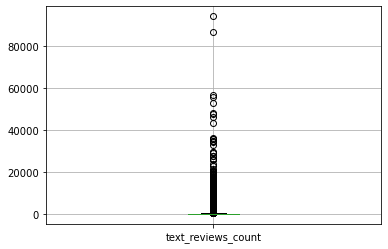

In [122]:
boxplot = df_filtered.boxplot(column=['text_reviews_count'], return_type='axes')

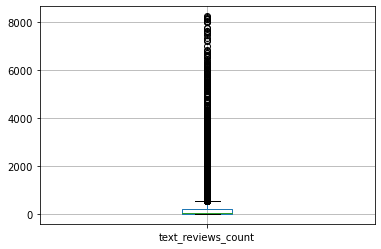

In [123]:
boxplot = df_z.boxplot(column=['text_reviews_count'], return_type='axes')

#### Delete not relevant = data processing

In [124]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [147]:
df_processed = df_z.drop(columns=["title","authors","isbn","isbn13","publisher","publication_date"])
df_processed.head(5)

,bookID,average_rating,language_code,num_pages,ratings_count,text_reviews_count
2,4,4.42,eng,352,6333,244
5,9,3.74,eng,152,19,1
7,12,4.38,eng,815,3628,254
8,13,4.38,eng,815,249558,4080
9,14,4.22,eng,215,4930,460


## Data encoding

The idea is to convert string fields into numeric fields in order to be able to be taking into account for the ML model.

In [148]:
df_processed = pd.concat([df_processed,pd.get_dummies(df_processed.language_code, drop_first=False, prefix='lang')],axis=1).drop(columns="language_code")

In [149]:
df_processed.dtypes

bookID                  int64
average_rating        float64
num_pages               int64
ratings_count           int64
text_reviews_count      int64
lang_ale                uint8
lang_ara                uint8
lang_eng                uint8
lang_fre                uint8
lang_ger                uint8
lang_gla                uint8
lang_glg                uint8
lang_grc                uint8
lang_ita                uint8
lang_jpn                uint8
lang_lat                uint8
lang_msa                uint8
lang_mul                uint8
lang_nl                 uint8
lang_nor                uint8
lang_por                uint8
lang_rus                uint8
lang_spa                uint8
lang_srp                uint8
lang_swe                uint8
lang_tur                uint8
lang_wel                uint8
lang_zho                uint8
dtype: object

In [150]:
df_filtered

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [151]:
df_processed

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,lang_ale,lang_ara,lang_eng,lang_fre,lang_ger,...,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel,lang_zho
2,4,4.42,352,6333,244,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9,3.74,152,19,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,12,4.38,815,3628,254,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,13,4.38,815,249558,4080,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,14,4.22,215,4930,460,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,4.06,512,156,20,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,45633,4.08,635,783,56,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,45634,3.96,415,820,95,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,45639,3.72,434,769,139,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's know handle the ratings which are considered as continuous as they are float, so we should convert them into categorical variables (multiclass).

from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()

encoded = lab_enc.fit_transform(df_processed.average_rating)
encoded_df = pd.DataFrame(encoded)
encoded_df.columns = ['average_rating_encoded']
encoded_df

df_bookID = df_processed[["bookID"]]
average_rating_encoded_df = encoded_df.join(df_bookID)
average_rating_encoded_df

final = pd.concat([df_processed, average_rating_encoded_df], axis=1)
final.drop('bookID', inplace=True, axis=1)
final.drop('average_rating', inplace=True, axis=1)
final

In [152]:
df_processed.isna().sum()

bookID                0
average_rating        0
num_pages             0
ratings_count         0
text_reviews_count    0
lang_ale              0
lang_ara              0
lang_eng              0
lang_fre              0
lang_ger              0
lang_gla              0
lang_glg              0
lang_grc              0
lang_ita              0
lang_jpn              0
lang_lat              0
lang_msa              0
lang_mul              0
lang_nl               0
lang_nor              0
lang_por              0
lang_rus              0
lang_spa              0
lang_srp              0
lang_swe              0
lang_tur              0
lang_wel              0
lang_zho              0
dtype: int64

In [153]:
df_processed.dtypes

bookID                  int64
average_rating        float64
num_pages               int64
ratings_count           int64
text_reviews_count      int64
lang_ale                uint8
lang_ara                uint8
lang_eng                uint8
lang_fre                uint8
lang_ger                uint8
lang_gla                uint8
lang_glg                uint8
lang_grc                uint8
lang_ita                uint8
lang_jpn                uint8
lang_lat                uint8
lang_msa                uint8
lang_mul                uint8
lang_nl                 uint8
lang_nor                uint8
lang_por                uint8
lang_rus                uint8
lang_spa                uint8
lang_srp                uint8
lang_swe                uint8
lang_tur                uint8
lang_wel                uint8
lang_zho                uint8
dtype: object

In [154]:
df_processed.tail(5)

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,lang_ale,lang_ara,lang_eng,lang_fre,lang_ger,...,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel,lang_zho
11118,45631,4.06,512,156,20,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11119,45633,4.08,635,783,56,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11120,45634,3.96,415,820,95,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11121,45639,3.72,434,769,139,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11122,45641,3.91,272,113,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [155]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10813 entries, 2 to 11122
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              10813 non-null  int64  
 1   average_rating      10813 non-null  float64
 2   num_pages           10813 non-null  int64  
 3   ratings_count       10813 non-null  int64  
 4   text_reviews_count  10813 non-null  int64  
 5   lang_ale            10813 non-null  uint8  
 6   lang_ara            10813 non-null  uint8  
 7   lang_eng            10813 non-null  uint8  
 8   lang_fre            10813 non-null  uint8  
 9   lang_ger            10813 non-null  uint8  
 10  lang_gla            10813 non-null  uint8  
 11  lang_glg            10813 non-null  uint8  
 12  lang_grc            10813 non-null  uint8  
 13  lang_ita            10813 non-null  uint8  
 14  lang_jpn            10813 non-null  uint8  
 15  lang_lat            10813 non-null  uint8  
 16  lang

## Choose a model

## Model training

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
df_train, df_test = train_test_split(df_processed,test_size = 0.2, random_state = 10)

In [158]:
print('Total length for the dataset processed :',len(final))
print('Total length for the train dataset :',len(df_train))
print('Total length for the test dataset :',len(df_test))

Total length for the dataset processed : 11121
Total length for the train dataset : 8650
Total length for the test dataset : 2163


In [159]:
# get the values of the columns for the training data
X_train = df_train.iloc[:, 2:27]
y_train = df_train.average_rating.values

In [160]:
X_train

,num_pages,ratings_count,text_reviews_count,lang_ale,lang_ara,lang_eng,lang_fre,lang_ger,lang_gla,lang_glg,...,lang_mul,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel
3252,495,21556,653,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10156,208,38,8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6943,400,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10042,144,617,43,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3727,198,122,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661,346,195,6,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7546,224,1715,63,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1421,401,25811,1463,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7548,410,45,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
y_train

array([4.09, 3.83, 3.67, ..., 3.63, 3.96, 3.97])

In [162]:
# get the values of the columns for the test data
X_test = df_test.iloc[:, 2:27].values
y_test = df_test.average_rating.values

In [163]:
X_test

array([[  208,  2227,   119, ...,     0,     0,     0],
       [  368, 78036,   692, ...,     0,     0,     0],
       [  576,   110,     7, ...,     0,     0,     0],
       ...,
       [  203,  1392,    86, ...,     0,     0,     0],
       [  250,   924,    25, ...,     0,     0,     0],
       [  132,   955,    41, ...,     0,     0,     0]], dtype=int64)

In [164]:
y_test

array([3.79, 4.02, 4.34, ..., 3.85, 3.44, 4.44])

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [167]:
# here we train the model on the training data
predictions = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [168]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()})
pred.head(20)

,Actual,Predicted
0,3.79,3.900310
1,4.02,4.016285
2,4.34,3.974430
3,4.03,3.916475
4,3.67,3.898314
5,4.26,3.935900
6,3.99,4.009957
7,4.17,3.882607
8,4.26,3.874544
9,3.89,3.910068


In [169]:
abs(predictions - y_test).sum()/len(y_test)

0.22330525418654043

In [170]:
import sklearn.metrics as metrics

In [171]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.22330525418654043
MSE: 0.11370299575665951
RMSE: 0.3371987481540516


<AxesSubplot:>

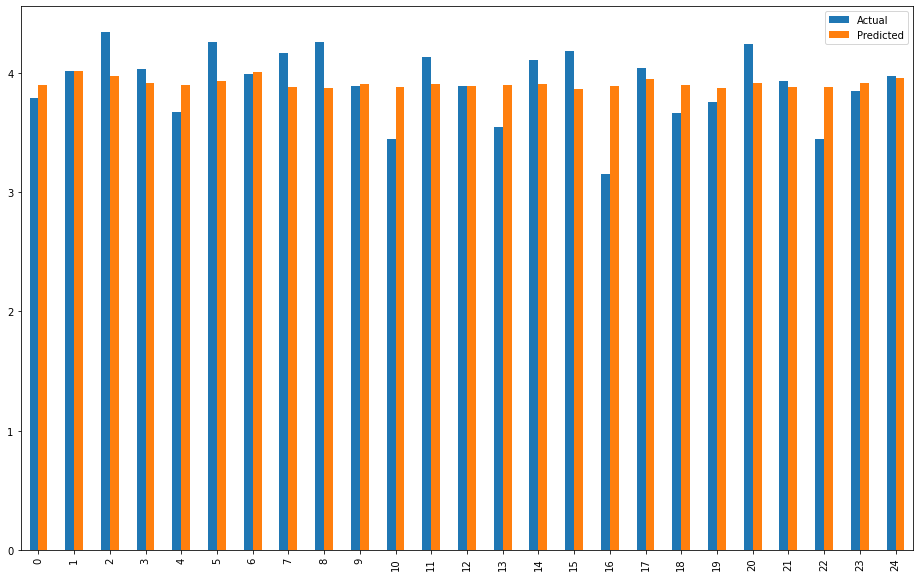

In [179]:
pred = pred.head(100)
pred.plot(kind='bar', figsize=(16, 10))

## Model evaluation

## Parameter tuning

## Making predictions